## 1. Import and install dependencies

In [10]:
# !pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

cv2 (OpenCV) – A library for image and video processing.

NumPy – A library for efficient numerical computations and large-scale data processing.

Matplotlib (pyplot) – A library for data visualization and plotting.

MediaPipe – A library for real-time hand, face, and body detection.

time – A library for measuring execution time and handling time-related operations.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
import time
import os

## 2. Accessing webcam using open cv and using holistic

In [22]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [27]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION (OPENCV)BGR TO (MEDIAPIPE)RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION (MEDIAPIPE)RGB TO (OPENCV)BGR
    return image, results

In [147]:
def draw_styled_landmarks(image, results):
    # Draw face full mask
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw face contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [127]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen 
        cv2.imshow('OpenCV Feed', image)
    
        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

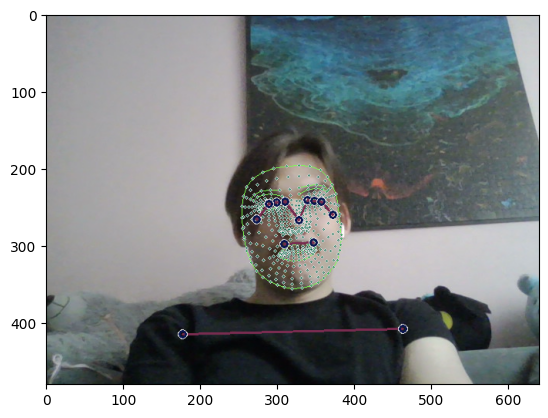

In [141]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 3. Extract keypoints 

dzien 

dobry

kochać

cię

do 

widzenia



In [151]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('PJM_Data') 

# Actions that we try to detect
actions = np.array(['dzien', 'dobry', 'kocham', 'ciebie', 'do', 'widziec'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [157]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass